In [1]:
from google.colab import drive
import os
import shutil
import zipfile


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
from pathlib import Path
import random
from PIL import Image

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, models, transforms, utils
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [1]:
import os

# Check if running in Kaggle
IS_KAGGLE = "KAGGLE_KERNEL_RUN_TYPE" in os.environ

if IS_KAGGLE:
    print("Running on Kaggle! No need to set up kaggle.json.")
else:
    print("Not running on Kaggle, setting up kaggle.json manually.")
    from google.colab import drive
    import shutil

    drive.mount('/content/drive')
    os.makedirs('/root/.kaggle', exist_ok=True)
    shutil.copy("/content/drive/My Drive/kaggle json/kaggle.json", "/root/.kaggle/kaggle.json")
    os.chmod('/root/.kaggle/kaggle.json', 600)


Running on Kaggle! No need to set up kaggle.json.


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.makedirs('/root/.kaggle', exist_ok=True)

shutil.copy("/content/drive/My Drive/kaggle json/kaggle.json", "/root/.kaggle/kaggle.json")

os.chmod('/root/.kaggle/kaggle.json', 600)

In [5]:
!pip install opendatasets

In [6]:
import opendatasets as od

In [7]:
od.download("https://www.kaggle.com/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: slave
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone


100%|██████████| 1.52G/1.52G [00:16<00:00, 99.2MB/s]


In [2]:
root_dir = Path('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone')

In [3]:
cv = '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/kidneyData.csv'

In [4]:
df = pd.read_csv('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/kidneyData.csv')

In [5]:
df.head()

,Unnamed: 0,image_id,path,diag,target,Class
0,0,Tumor- (1044),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
1,1,Tumor- (83),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
2,2,Tumor- (580),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
3,3,Tumor- (1701),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
4,4,Tumor- (1220),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor


In [6]:
df = df.drop('Unnamed: 0', axis=1)

In [7]:
for dir_path,dir_names, file_names in os.walk(root_dir):
  print(f"There are {len(dir_names)} directories and {len(file_names)} images in {dir_path}")

There are 4 directories and 0 images in /kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone
There are 0 directories and 3709 images in /kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst
There are 0 directories and 2283 images in /kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor
There are 0 directories and 1377 images in /kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone
There are 0 directories and 5077 images in /kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal


<Axes: xlabel='Class', ylabel='count'>

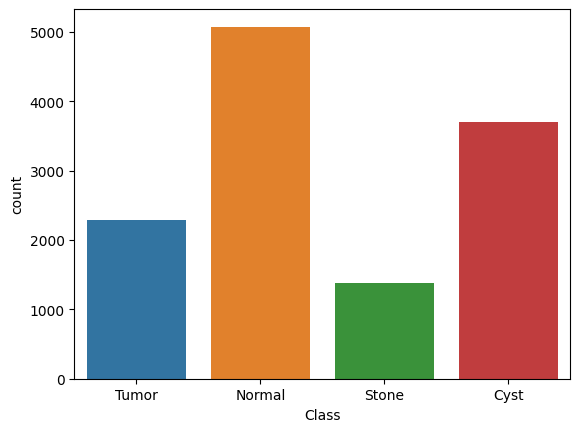

In [8]:
sns.countplot(x=df['Class'])

In [9]:
img_path_list = list(root_dir.glob('*/*'))
len(img_path_list), len(df)


(12446, 12446)

In [10]:
img_path_list

[PosixPath('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (3178).jpg'),
 PosixPath('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (3561).jpg'),
 PosixPath('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (900).jpg'),
 PosixPath('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1148).jpg'),
 PosixPath('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (268).jpg'),
 PosixPath('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-

In [11]:
five = [name.stem for name in img_path_list[:5]]

In [12]:
five

['Cyst- (3178)', 'Cyst- (3561)', 'Cyst- (900)', 'Cyst- (1148)', 'Cyst- (268)']

In [13]:
df[df['image_id'].isin(five)]

,image_id,path,diag,target,Class
10297,Cyst- (1148),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
10921,Cyst- (268),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
11705,Cyst- (3561),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
11856,Cyst- (3178),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12089,Cyst- (900),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst


In [14]:
df[df['image_id'] == 'Normal- (4786)']

,image_id,path,diag,target,Class
3145,Normal- (4786),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Normal,1,Normal


In [15]:
labal = df[df['image_id'].isin(five)]['Class'].to_list()
labal

['Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst']

In [16]:

def plot_img(path, img_num,cols):
  img_path_list = list(path.glob('*/*'))
  img_num = min(img_num,len(img_path_list))
  ran_img_list = random.sample(img_path_list,img_num)

  img_name = [name.stem for name in ran_img_list]
  labal = df[df['image_id'].isin(img_name)]['Class'].to_list()

  cols = min(cols,img_num)
  rows = (img_num + cols+1) // cols

  fig,axes = plt.subplots(rows,cols,figsize = (10,10))
  axes = axes.flatten()

  for i in range(img_num):
    img = plt.imread(ran_img_list[i])
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"label: {labal[i]}")

  for j in range(i +1, len(axes)):
    fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

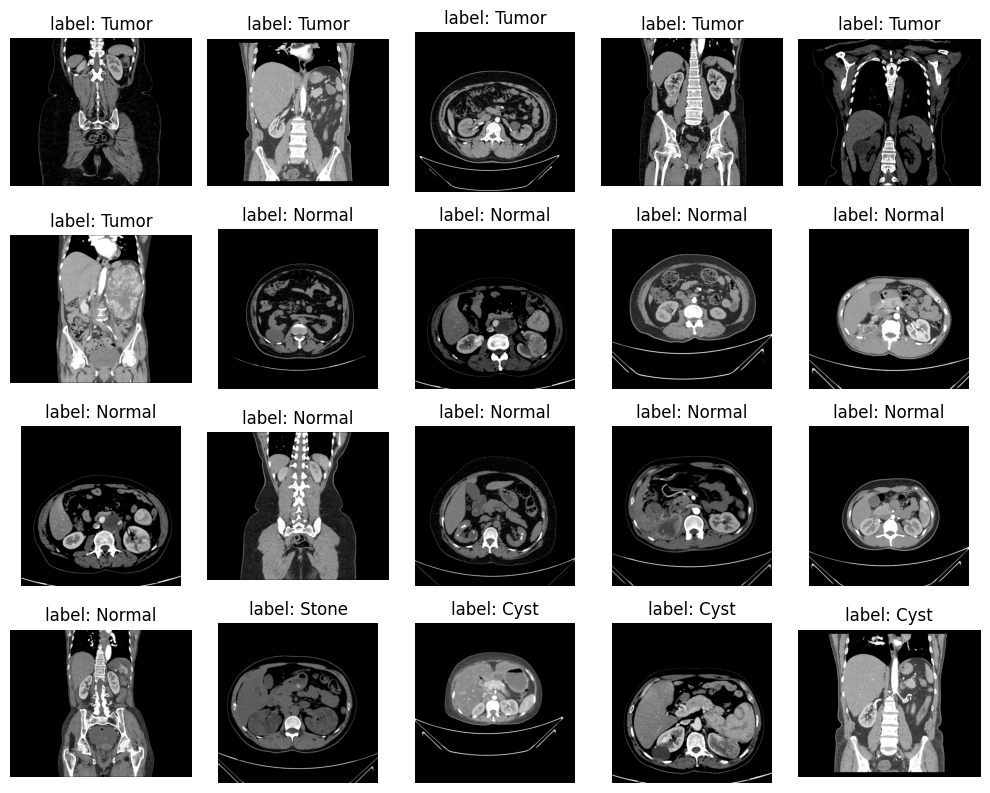

In [17]:
plot_img(root_dir,20,5)

In [18]:
class Kidney(Dataset):
  def __init__(self,root_dir, csv, transform=None):
    self.root_dir = root_dir
    self.csv = pd.read_csv(csv)
    self.transform = transform
    self.img_path_list = list(root_dir.glob('*/*'))
  def __len__(self):
     return len(self.img_path_list)

  def __getitem__(self,idx):
      img_path = self.root_dir /self.csv.iloc[idx,3] / (self.csv.iloc[idx,1] + '.jpg')
      img = Image.open(img_path).convert("RGB")
      labal = self.csv.iloc[idx,4]

      if self.transform is not None:
        img = self.transform(img)

      return img, labal



In [29]:
train_transsform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=30),
    transforms.RandomAffine(degrees=(-10, 10), translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])

In [30]:
dataset = Kidney(root_dir,cv,transform=train_transsform)

In [31]:
train, test = torch.utils.data.random_split(dataset,[int(0.8*len(dataset)),len(dataset) - int(0.8*len(dataset))])

In [32]:
train_dataloader = DataLoader(train,batch_size=8,shuffle=True)
test_dataloader = DataLoader(test,batch_size=8,shuffle=False)

In [33]:
dataset[4]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 3)

In [34]:
root_dir / (dataset.csv.iloc[2,1] + '.jpg')

PosixPath('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor- (580).jpg')

In [35]:
root_dir / (df.iloc[2]['image_id'] + '.jpg')

PosixPath('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor- (580).jpg')

In [36]:
root_dir / df.iloc[2,0]

PosixPath('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor- (580)')

In [37]:
df.iloc[2,0]

'Tumor- (580)'

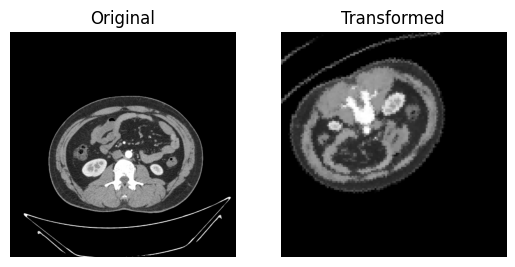

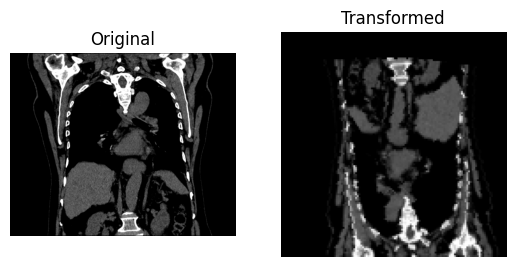

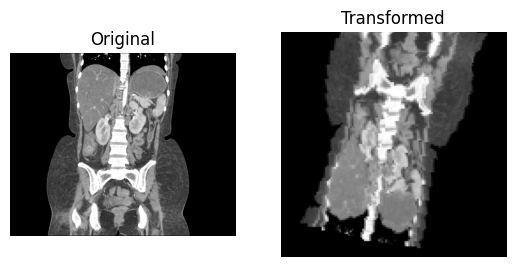

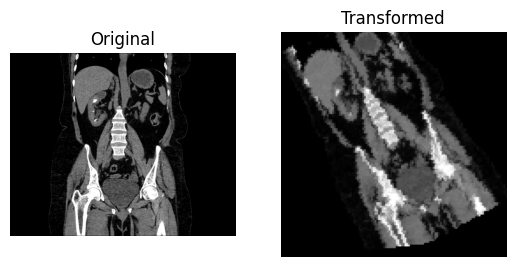

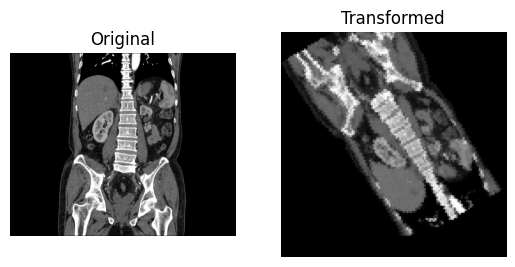

In [38]:
ran_img_list = random.sample(img_path_list,5)
for i in ran_img_list:
  fig,axes = plt.subplots(1,2,)
  img = Image.open(i).convert("RGB")

  axes[0].imshow(img)
  axes[0].axis('off')
  axes[0].set_title("Original")

  trans_img = train_transsform(img)
  trans_img = trans_img.permute(1, 2, 0).numpy()

  axes[1].imshow(trans_img)
  axes[1].axis('off')
  axes[1].set_title("Transformed")

In [39]:
class Model_0(nn.Module):
    def __init__(self,
                 class_num=4,
                 out_1=32,
                 out_2=64,
                 out_3=128,
                 out_4=256):
        super().__init__()

        self.cnn1 = nn.Conv2d(in_channels=3, out_channels=out_1, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(out_1)
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_2)

        self.cnn3 = nn.Conv2d(in_channels=out_2, out_channels=out_3, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(out_3)
        self.cnn4 = nn.Conv2d(in_channels=out_3, out_channels=out_4, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(out_4)

        self.max_pool = nn.MaxPool2d(kernel_size=2)

        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(out_4 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, class_num)

    def forward(self, x):
        x = F.relu(self.bn1(self.cnn1(x)))
        x = F.relu(self.bn2(self.cnn2(x)))
        x = self.max_pool(x)  # 128x128 -> 64x64

        x = F.relu(self.bn3(self.cnn3(x)))
        x = F.relu(self.bn4(self.cnn4(x)))
        x = self.max_pool(x)  # 64x64 -> 32x32

        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [40]:
def train_step(model, dataloader, loss_fn, acc_fn, optimizer, device):
  size = len(dataloader.dataset)
  batch_size = len(dataloader)
  model.train()
  train_loss, train_acc = 0, 0
  for X, y in dataloader:
    X, y = X.to(device), y.to(device)

    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()

    train_loss += loss.item()
    acc = acc_fn(y_pred.argmax(dim=1), y)
    train_acc += acc

  return train_acc / batch_size, train_loss / batch_size

In [41]:
def test_step(model, dataloader, loss_fn, acc_fn, device):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, test_acc = 0.0, 0.0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            loss = loss_fn(y_pred, y)
            test_loss += loss.item()

            acc = acc_fn(y_pred.argmax(dim=1), y)
            test_acc += acc

    return test_acc / num_batches, test_loss / num_batches


In [66]:
def trainx(model, train_dataloader, test_dataloader, loss_fn, acc_fn, optimizer, device, epochs):
    train_acc_list, test_acc_list = [], []
    train_loss_list, test_loss_list = [], []

    for epoch in range(epochs):
        train_acc, train_loss = train_step(model, train_dataloader, loss_fn, acc_fn, optimizer, device)
        test_acc, test_loss = test_step(model, test_dataloader, loss_fn, acc_fn, device)

        train_acc_list.append(train_acc)
        train_loss_list.append(train_loss)
        test_acc_list.append(test_acc)
        test_loss_list.append(test_loss)

        print(f"Epoch {epoch+1}: Train Acc: {train_acc:.4f}, Train Loss: {train_loss:.4f} | Test Acc: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

    return train_acc_list, test_acc_list, train_loss_list, test_loss_list


In [67]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [68]:
class KidneyDiseaseModel(nn.Module):
    def __init__(self, num_classes=4):
        super(KidneyDiseaseModel, self).__init__()
        self.backbone = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)

        in_features = self.backbone.classifier[1].in_features 
        self.backbone.classifier = nn.Sequential(
            nn.Dropout(0.3),  
            nn.Linear(in_features, num_classes) 
        )

    def forward(self, x):
        return self.backbone(x)



In [69]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [70]:
model = KidneyDiseaseModel(num_classes=4).to(device)

In [71]:
loss_fn = nn.CrossEntropyLoss()

In [72]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [73]:
def acc_fn(y_pred, y_true):
    return (y_pred == y_true).sum().item() / len(y_true)

In [74]:
epochs = 10
trainx(model, train_dataloader, test_dataloader, loss_fn, acc_fn, optimizer, device, epochs)

Epoch 1: Train Acc: 0.7444, Train Loss: 0.6970 | Test Acc: 0.8001, Test Loss: 0.5691
Epoch 2: Train Acc: 0.8888, Train Loss: 0.3037 | Test Acc: 0.9595, Test Loss: 0.1187
Epoch 3: Train Acc: 0.9265, Train Loss: 0.2038 | Test Acc: 0.9772, Test Loss: 0.0846
Epoch 4: Train Acc: 0.9513, Train Loss: 0.1338 | Test Acc: 0.9808, Test Loss: 0.0704
Epoch 5: Train Acc: 0.9640, Train Loss: 0.1081 | Test Acc: 0.9876, Test Loss: 0.0389
Epoch 6: Train Acc: 0.9722, Train Loss: 0.0851 | Test Acc: 0.9824, Test Loss: 0.0516
Epoch 7: Train Acc: 0.9753, Train Loss: 0.0697 | Test Acc: 0.9944, Test Loss: 0.0218
Epoch 8: Train Acc: 0.9815, Train Loss: 0.0553 | Test Acc: 0.9824, Test Loss: 0.0458
Epoch 9: Train Acc: 0.9835, Train Loss: 0.0459 | Test Acc: 0.9924, Test Loss: 0.0184
Epoch 10: Train Acc: 0.9879, Train Loss: 0.0366 | Test Acc: 0.9615, Test Loss: 0.1010


([0.7443775100401606,
  0.8887550200803213,
  0.9265060240963855,
  0.9513052208835341,
  0.9639558232931726,
  0.9721887550200803,
  0.9753012048192771,
  0.9815261044176706,
  0.9835341365461847,
  0.98785140562249],
 [0.8000801282051282,
  0.9595352564102564,
  0.9771634615384616,
  0.9807692307692307,
  0.9875801282051282,
  0.9823717948717948,
  0.9943910256410257,
  0.9823717948717948,
  0.9923878205128205,
  0.9615384615384616],
 [0.6969718246066188,
  0.30370430314060615,
  0.20383254153725044,
  0.13383391189412774,
  0.1080718021131547,
  0.0851076589626925,
  0.06974799365190233,
  0.055273818596677404,
  0.0458909748276155,
  0.03662674399048086],
 [0.5691408845954217,
  0.11872109448319325,
  0.08457255172050701,
  0.07042582685687357,
  0.03893211013471442,
  0.0515765796281369,
  0.021772165484668593,
  0.04578830834324412,
  0.018381666099248132,
  0.1010197180315129])

In [89]:
import matplotlib.pyplot as plt

def plot_metrics(train_acc, test_acc, train_loss, test_loss, epochs):
    fig, ax1 = plt.subplots(figsize=(8,5))

    # Left y-axis (Accuracy)
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy', color='tab:blue')
    ax1.plot(range(1, epochs+1), train_acc, 'o-', label="Train Accuracy", color='tab:blue')
    ax1.plot(range(1, epochs+1), test_acc, 's-', label="Test Accuracy", color='tab:cyan')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()  
    ax2.set_ylabel('Loss', color='tab:red')
    ax2.plot(range(1, epochs+1), train_loss, 'o--', label="Train Loss", color='tab:red')
    ax2.plot(range(1, epochs+1), test_loss, 's--', label="Test Loss", color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    fig.suptitle('Training & Testing Accuracy and Loss')
    fig.legend(loc="upper center", bbox_to_anchor=(0.7, 0.55), ncol=2)

    plt.show()


In [90]:
print(len(train_acc_list), len(test_acc_list), len(train_loss_list), len(test_loss_list))


10 10 10 10


In [91]:
train_acc_list

[0.7444, 0.8888, 0.9265, 0.9513, 0.964, 0.9722, 0.9753, 0.9815, 0.9835, 0.9879]

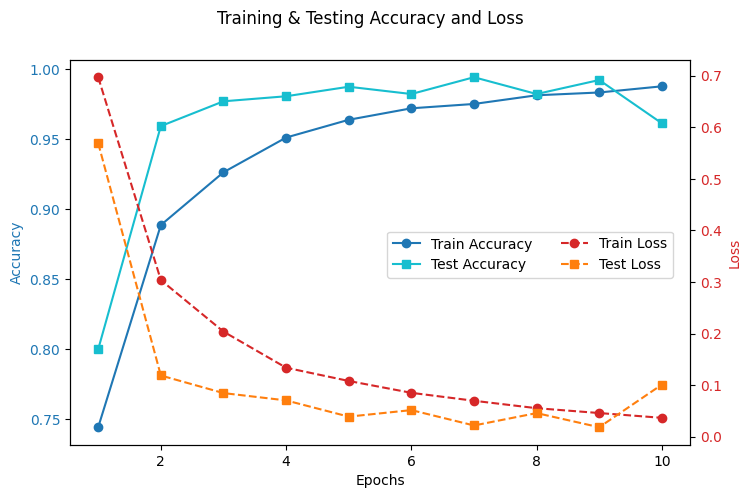

In [92]:
plot_metrics(train_acc_list, test_acc_list, train_loss_list, test_loss_list, epochs)